In [13]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input/brian-tumor-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Se

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


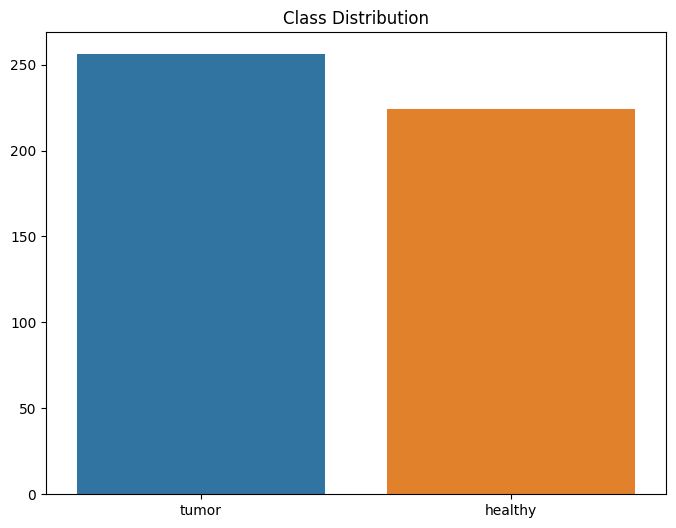

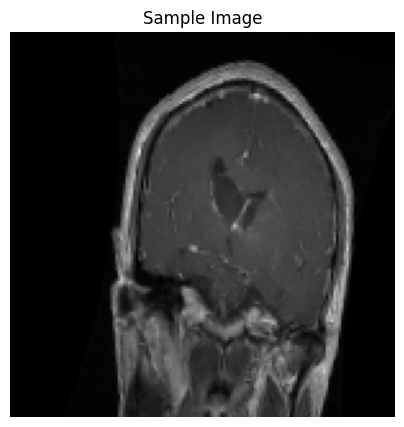

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 117s 974ms/step - accuracy: 0.5376 - loss: 1.4988 - val_accuracy: 0.5893 - val_loss: 1.1834 - learning_rate: 1.0000e-04
Epoch 2/20
  1/115 ━━━━━━━━━━━━━━━━━━━━ 1:33 817ms/step - accuracy: 0.6250 - loss: 1.1898

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.1898 - val_accuracy: 0.6957 - val_loss: 1.1162 - learning_rate: 1.0000e-04
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 113s 964ms/step - accuracy: 0.6165 - loss: 1.1232 - val_accuracy: 0.6473 - val_loss: 1.0214 - learning_rate: 1.0000e-04
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.9174 - val_accuracy: 0.5652 - val_loss: 1.0500 - learning_rate: 1.0000e-04
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 113s 966ms/step - accuracy: 0.6820 - loss: 0.9238 - val_accuracy: 0.7098 - val_loss: 0.8923 - learning_rate: 1.0000e-04
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.8627 - val_accuracy: 0.7826 - val_loss: 0.7593 - learning_rate: 1.0000e-04
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 114s 973ms/step - accuracy: 0.6958 - loss: 0.8387 - val_accuracy: 0.6987 - val_loss: 0.8461 - learning_rate: 1.0000e-04
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy

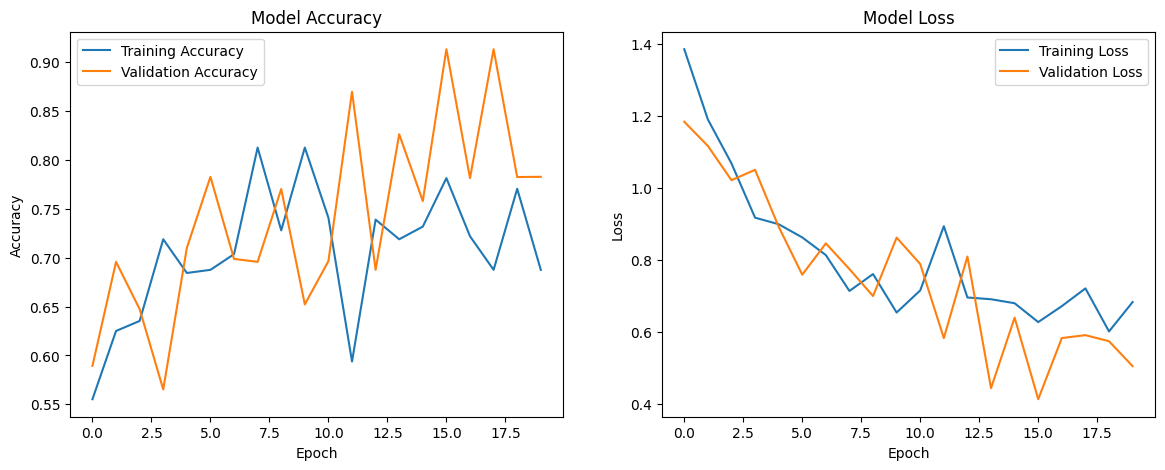

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data directory
data_dir = "/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/"

# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation set, just rescaling
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create train generator
train = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=123
)

# Create validation generator
val = val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=True,
    seed=123
)

# Print classes distribution
t, h = 0, 0
for i in range(15):
    _, labels = next(train)
    t += np.sum(labels == 0)
    h += np.sum(labels == 1)

plt.figure(figsize=(8, 6))
sns.barplot(x=['tumor', 'healthy'], y=[t, h])
plt.title('Class Distribution')
plt.show()

# Plot a sample image from the training data
batch = next(train)
plt.figure(figsize=(5,5))
plt.imshow(batch[0][0])
plt.title('Sample Image')
plt.axis('off')
plt.show()

# Build the model with Regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout Regularization
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Reduced Learning Rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Implement Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train,
    steps_per_epoch=train.samples // train.batch_size,
    epochs=20,
    validation_data=val,
    validation_steps=val.samples // val.batch_size,
    callbacks=[early_stopping, reduce_lr],  # Add the callbacks
    verbose=1
)

# Plot the results
# Accuracy plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,359,365 (39.52 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,906,244 (26.35 MB)

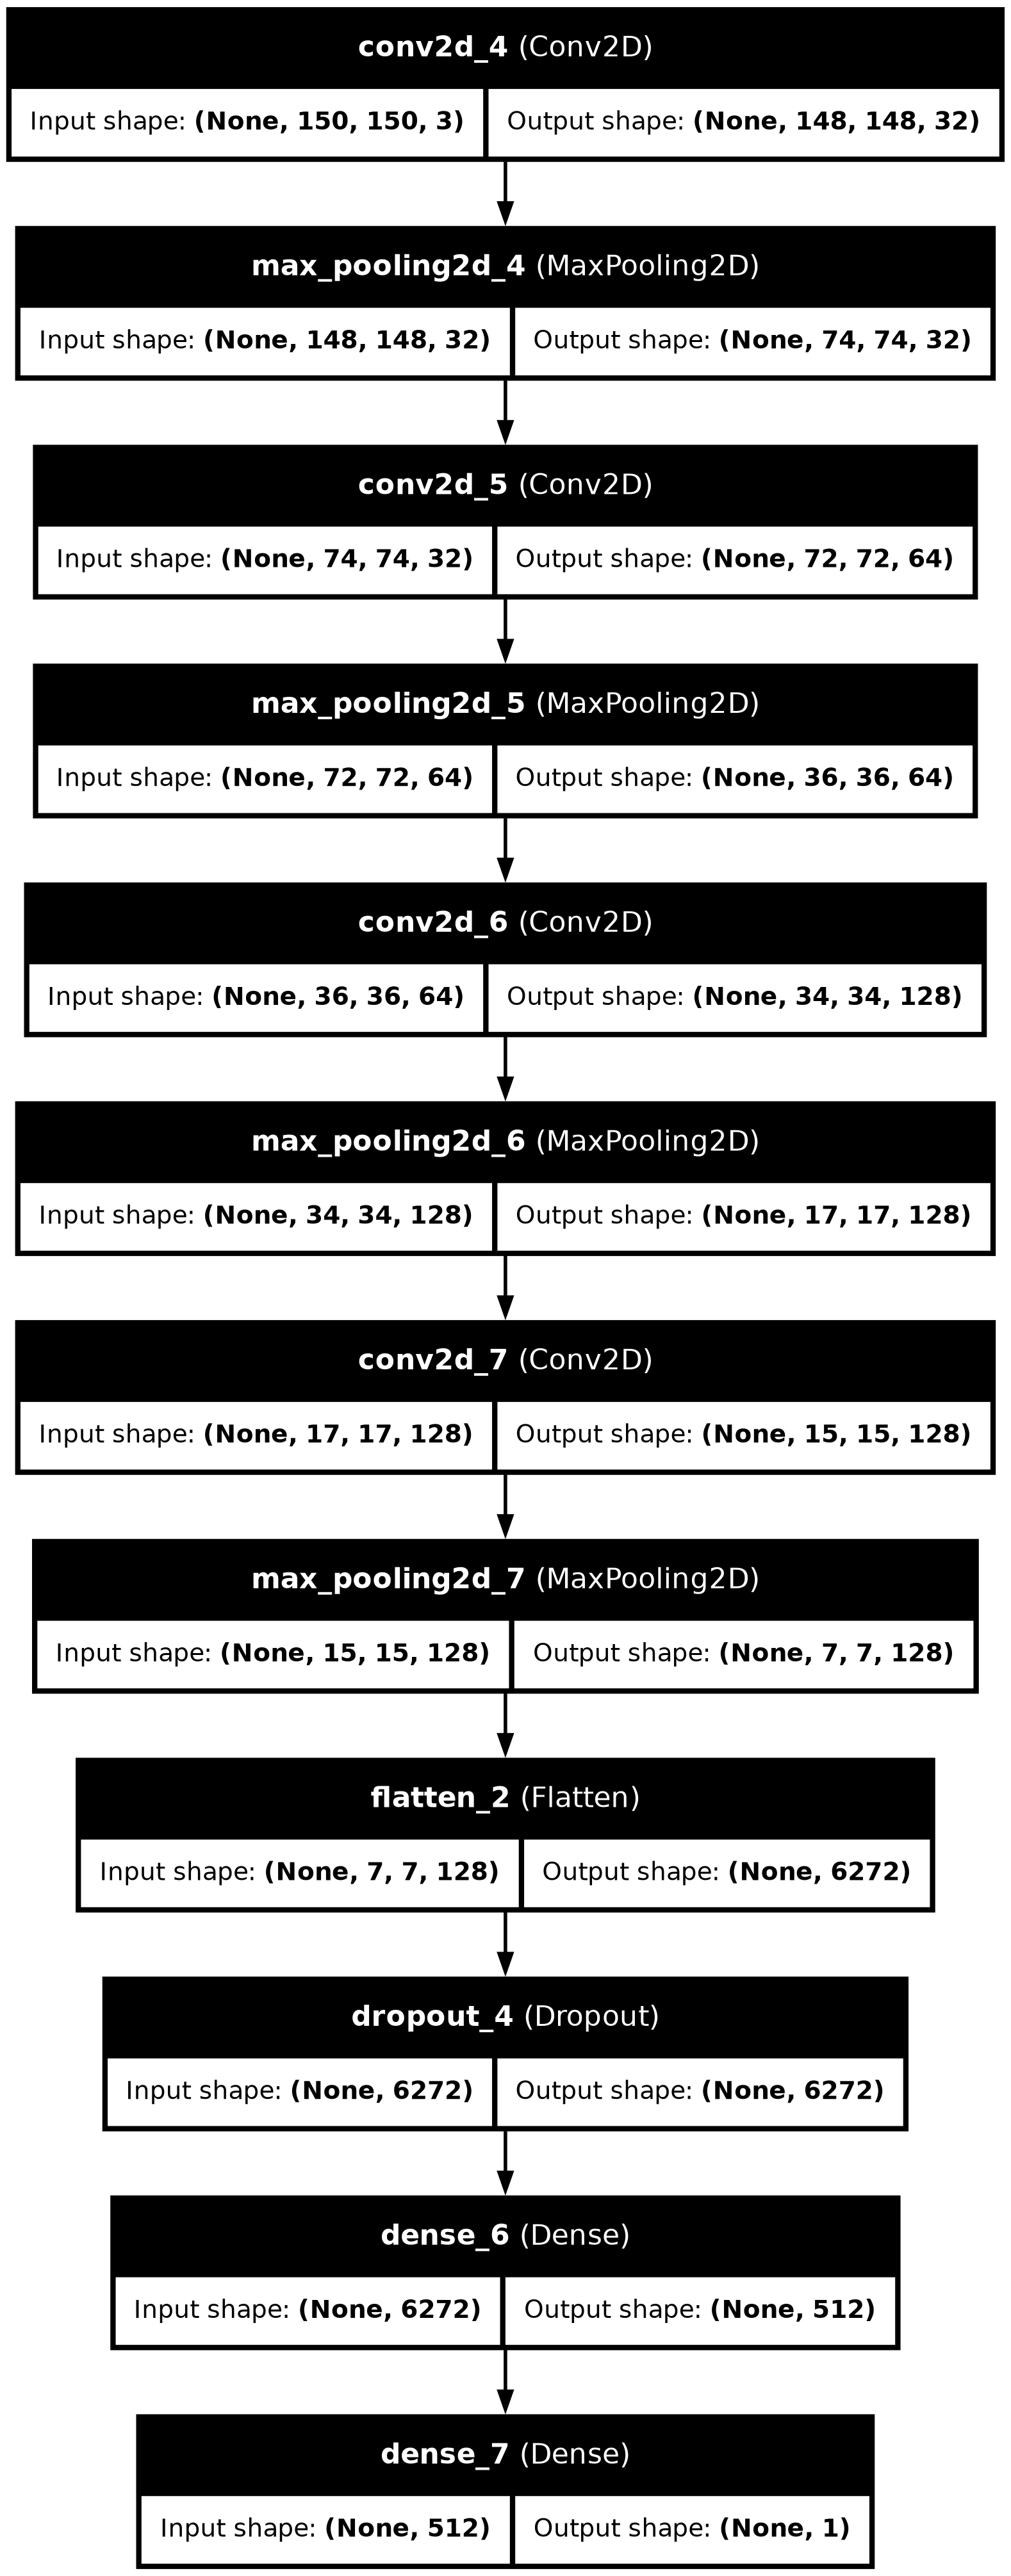

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Print the model summary
model.summary()

# Plot model architecture and save it as an image
plot_model(
    model, 
    to_file='model_architecture.png', 
    show_shapes=True, 
    show_layer_names=True
)
